In [1]:
import os
import sys
sys.path.append('../..')
from GKP_ampDamp import *
import numpy as np

In [2]:
Delta = 0.309
print('Delta =',Delta)
n_D = comp_n_Delta(Delta)
print('n_Delta =',n_D)
gamma_lst = np.linspace(0,0.1,11)
print('gamma list:',list(gamma_lst))


Delta = 0.309
n_Delta = 4.752547776198276
gamma list: [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]


compute transpose infidelity directly

In [3]:

dimL=20
cutoff = 5
infid_M_lst = []
for gamma in gamma_lst:
    ElmuBasis = GKP_ElmuBasis(Delta = Delta, gamma = gamma, m_sum_cutoff=20,M_sum_cutoff=5,l_cut=20)
    # check
    if 1:
        ck = check_basis(ElmuBasis = ElmuBasis,nBasis = None)
        ck.trM()
    infid_M = ElmuBasis.transpose_infid_M()
    print(str(infid_M))
    infid_M_lst.append(infid_M)
print('infid_M_lst =',infid_M_lst)


tr(M)-2 = 4.440892098500626e-16
0.0
tr(M)-2 = 1.3322676295501878e-15
1.4690434073649783e-06
tr(M)-2 = 8.881784197001252e-16
6.8271675182085545e-06
tr(M)-2 = 4.440892098500626e-16
2.065207621415599e-05
tr(M)-2 = 8.881784197001252e-16
4.989009431055624e-05
tr(M)-2 = -8.881784197001252e-15
0.00010406770167314949
tr(M)-2 = -1.6631140908884845e-13
0.0001953371615492916
tr(M)-2 = -1.765476653758924e-12
0.00033838815759090757
tr(M)-2 = -1.2661871551244985e-11
0.0005502794177320025
tr(M)-2 = -6.784284245497929e-11
0.0008502534286681795
tr(M)-2 = -2.898841167109367e-10
0.0012595910770031304
infid_M_lst = [0.0, 1.4690434073649783e-06, 6.8271675182085545e-06, 2.065207621415599e-05, 4.989009431055624e-05, 0.00010406770167314949, 0.0001953371615492916, 0.00033838815759090757, 0.0005502794177320025, 0.0008502534286681795, 0.0012595910770031304]


SDP results

In [4]:
SDP_lst = []
for gamma in gamma_lst:
    n_cut = 40
    i_cut = 10
    eps = 1e-7
    nBasis = GKP_nBasis(Delta, gamma, n_cut, sum_cutoff = 5)
    res = 1-nBasis.SDP_optimize_Recovery_numberBasis(eps=eps)[0]
    SDP_lst.append(res)
    print(res)
print('SDP_lst =',SDP_lst)

5.300896055437931e-09
1.4489124946504006e-06
6.379017341795468e-06
1.8407032096989795e-05
4.373750704556034e-05
8.957417523003386e-05
0.00016647553747306532
0.0002875600418401625
0.00046731644520969784
0.0007225481486202723
0.0010721814353171766
SDP_lst = [5.300896055437931e-09, 1.4489124946504006e-06, 6.379017341795468e-06, 1.8407032096989795e-05, 4.373750704556034e-05, 8.957417523003386e-05, 0.00016647553747306532, 0.0002875600418401625, 0.00046731644520969784, 0.0007225481486202723, 0.0010721814353171766]


compute transpose infidelity according to 1st and 2nd approximation.

In [5]:
dimL=20
cutoff = 5
infid_approx_Ord1_lst = []
infid_approx_Ord2_lst = []
for gamma in gamma_lst:
    ElmuBasis = GKP_ElmuBasis(Delta = Delta, gamma = gamma, m_sum_cutoff=20,M_sum_cutoff=5,l_cut=20)
    # check
    if 0:
        ck = check_basis(ElmuBasis = ElmuBasis,nBasis = None)
        ck.trM()
    infid_approx_Ord1 = ElmuBasis.transpose_infid_approx(approxOrd=1)
    infid_approx_Ord1_lst.append(infid_approx_Ord1)
    infid_approx_Ord2 = ElmuBasis.transpose_infid_approx(approxOrd=2)
    infid_approx_Ord2_lst.append(infid_approx_Ord2)
    print(infid_approx_Ord1,infid_approx_Ord2)
print('infid_approx_Ord1_lst =',infid_approx_Ord1_lst)
print('infid_approx_Ord2_lst =',infid_approx_Ord2_lst)

1.3632578664664064e-07 1.3632578664664064e-07
1.865230929622572e-07 3.2470582119321497e-07
2.4686934411289985e-07 1.4398198281022067e-06
3.1743981984765916e-07 5.339453944883321e-06
3.9800492450526655e-07 1.555053326633059e-05
4.880613491819112e-07 3.788355578502227e-05
5.868738199133323e-07 8.104489310186436e-05
6.935222615967288e-07 0.0001572231342368339
8.069501809245077e-07 0.0002826336395842866
9.260111348793015e-07 0.00047800659296460976
1.049511151231223e-06 0.0007689999589175387
infid_approx_Ord1_lst = [1.3632578664664064e-07, 1.865230929622572e-07, 2.4686934411289985e-07, 3.1743981984765916e-07, 3.9800492450526655e-07, 4.880613491819112e-07, 5.868738199133323e-07, 6.935222615967288e-07, 8.069501809245077e-07, 9.260111348793015e-07, 1.049511151231223e-06]
infid_approx_Ord2_lst = [1.3632578664664064e-07, 3.2470582119321497e-07, 1.4398198281022067e-06, 5.339453944883321e-06, 1.555053326633059e-05, 3.788355578502227e-05, 8.104489310186436e-05, 0.0001572231342368339, 0.000282633639

plot

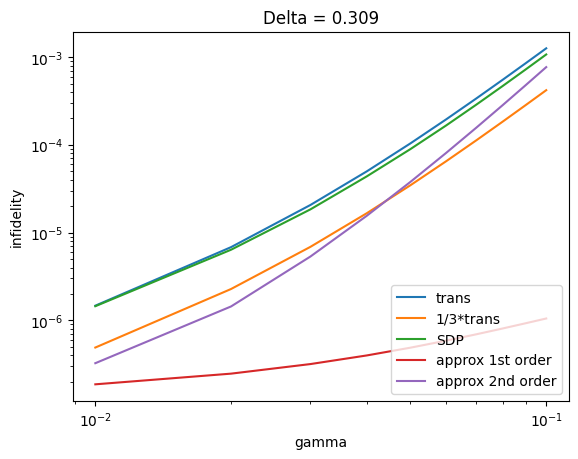

In [8]:
import matplotlib.pyplot as plt
import numpy as np
gamma_lst = [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
infid_M_lst = np.array([0.0, 1.4690434073649783e-06, 6.8271675182085545e-06, 2.065207621415599e-05, 4.989009431055624e-05, 0.00010406770167314949, 0.0001953371615492916, 0.00033838815759090757, 0.0005502794177320025, 0.0008502534286681795, 0.0012595910770031304])
infid_approx_Ord1_lst = np.array([1.3632578664664064e-07, 1.865230929622572e-07, 2.4686934411289985e-07, 3.1743981984765916e-07, 3.9800492450526655e-07, 4.880613491819112e-07, 5.868738199133323e-07, 6.935222615967288e-07, 8.069501809245077e-07, 9.260111348793015e-07, 1.049511151231223e-06])
infid_approx_Ord2_lst = np.array([1.3632578664664064e-07, 3.2470582119321497e-07, 1.4398198281022067e-06, 5.339453944883321e-06, 1.555053326633059e-05, 3.788355578502227e-05, 8.104489310186436e-05, 0.0001572231342368339, 0.0002826336395842866, 0.00047800659296460976, 0.0007689999589175387])
SDP_lst =[5.300896055437931e-09, 1.4489124946504006e-06, 6.379017341795468e-06, 1.8407032096989795e-05, 4.373750704556034e-05, 8.957417523003386e-05, 0.00016647553747306532, 0.0002875600418401625, 0.00046731644520969784, 0.0007225481486202723, 0.0010721814353171766]
gamma = gamma_lst[1:]
SDP = SDP_lst[1:]
trans = infid_M_lst[1:]
trans_1st = infid_approx_Ord1_lst[1:]
trans_2st = infid_approx_Ord2_lst[1:]

plt.plot(gamma, trans,label="trans")
plt.plot(gamma, trans/3,label="1/3*trans")
plt.plot(gamma, SDP,label="SDP")
plt.plot(gamma, trans_1st,label="approx 1st order")
plt.plot(gamma, trans_2st,label="approx 2nd order")

plt.xlabel('gamma')
plt.ylabel('infidelity')
plt.title('Delta = 0.309')
plt.legend(loc = 'lower right')
plt.yscale('log')
plt.xscale('log')
plt.show()